In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import network_module as nm
import argparse

def print_csv(filename, data):
    with open(filename, 'wb') as out:
        for t in data:
            out.write('{}\t{}\n'.format(*t))

netname = 'conv5-3x3-maxpool-100'


def loadmnist():
    import cPickle, gzip, numpy

    # Load the dataset
    f = gzip.open('./MNIST_data/mnist.pkl.gz', 'rb')
    sets = cPickle.load(f)
    f.close()
    res = []
    for set in sets:
        set[0].shape = (-1, 1, 28, 28)

        label = set[1]
        onehot = np.zeros((label.size, label.max() + 1))
        onehot[np.arange(label.size), label] = 1
        res.append((set[0].reshape(-1, 1, 28, 28), onehot))
    return res


print 'Loading MNIST images...'
train, test, _= loadmnist()


def loadnetwork(network_source):
    global nn
    nn = nm.load(network_source)


result = []
    
    
def print_test(loss_list):
    global result
    result.append(np.mean(loss_list))
    print ' --- Epoch: ', nn.last_epoch,\
    '  Mean loss: ', np.mean(loss_list)
    
    imshow(nn.get_output(train[0][:3]))
    
def print_loss(loss):
    #global result
    #result += loss
    print loss

print 'Working with network:', netname
def train_net():
  print 'Training network:', netname
  nn.SGD(train_policy=nn.fix_epoch,
         training_set=(train[0][:10000], target),
         batch=64, rate=0.0001, 
         epoch_call_back=print_test, 
#         batch_call_back=print_loss,
         epoch=25)

  
  plt.show(plt.plot(result))
    
  print 'Saving network snapshot to {}.net'.format(netname)
  nn.save_state('./nets/' + netname + '.net')


    
    
def imshow(im, cmap='Greys', interpol='None'):
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    if len(im.shape) == 3:
        for i, x in enumerate(im, 1):
            plt.subplot(1, len(im), i)
            plt.imshow(x.squeeze(), cmap=cmap, interpolation=interpol)
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
            plt.gca().yaxis.set_major_locator(plt.NullLocator())
    if len(im.shape) == 4:
        for irow, xrow in enumerate(im, 0):
            for icol, x in enumerate(xrow, 1):
                # print '\r  ', len(im), len(xrow), irow * len(xrow) + icol
                plt.subplot(len(im), len(xrow), irow * len(xrow) + icol)
                plt.imshow(x.squeeze(), cmap=cmap, interpolation=interpol)
                plt.gca().xaxis.set_major_locator(plt.NullLocator())
                plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.show()
    return im.shape


Loading MNIST images...
Working with network: conv5-3x3-maxpool-100


In [2]:
nn = nm.network(in_shape=train[0][0].shape, criterion='MSE')
nn.add_conv(kernel_shape=(3,3), num_of_ker=5)
c = nn[1]
c.shape

(5, 26, 26)

In [3]:
c.kernels.shape

(5, 1, 3, 3)

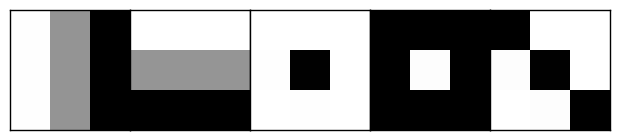

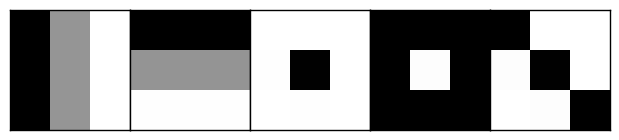

(5, 3, 3)

In [4]:
ker = []
ker.append(np.broadcast_to([-1.0, 0.0, 1.0], (3,3)))

ker.append(ker[0].T)

k = -1 * np.ones((3,3))
k[1,1] = 6
ker.append(k)
ker.append(-k)
ker.append(np.eye(3))
ker = np.array(ker)
imshow(ker)
imshow(ker[:, ::-1, ::-1])

In [5]:
c.kernels = ker
target = (nn.get_output(train[0][:10]))

(10000, 9, 676)


(3, 9, 676)


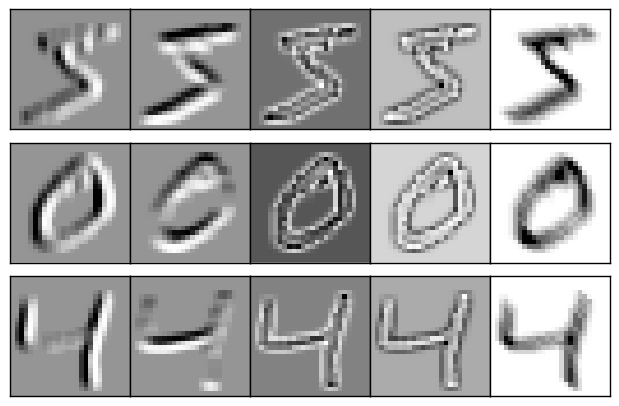

(3, 5, 26, 26)

In [6]:
imshow(nn.get_output(train[0][:3]))

(3, 9, 676)


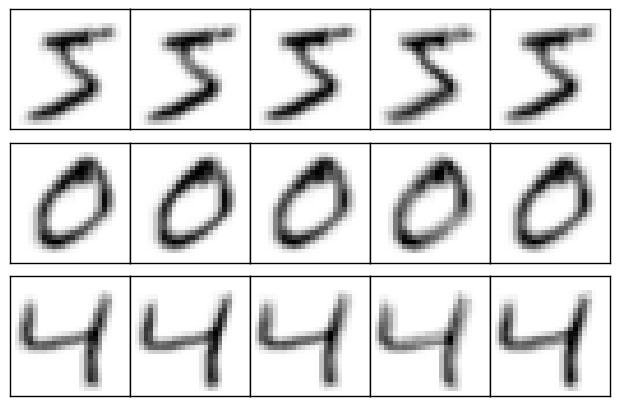

(3, 5, 26, 26)

In [14]:
imshow(nn.get_output(train[0][:3]))

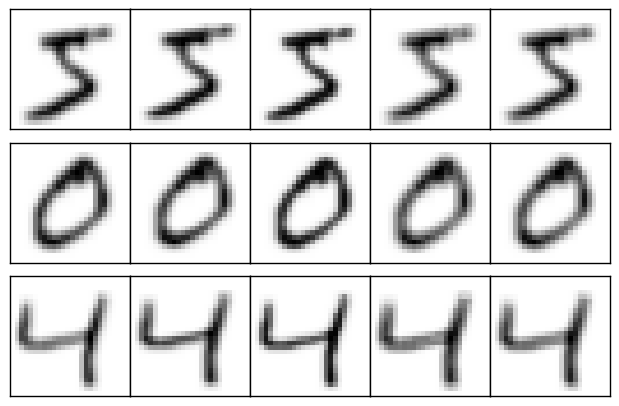

(3, 5, 26, 26)

In [12]:
imshow(nn.get_output(train[0][:3]))

In [15]:
train_net()

Training network: conv5-3x3-maxpool-100
(65, 9, 676)
   batch: 1 of 156

NameError: global name 'im2col' is not defined

Training network: conv5-3x3-maxpool-100
   batch: 156 of 156  --- Epoch:  1   Mean loss:  44893.1266446


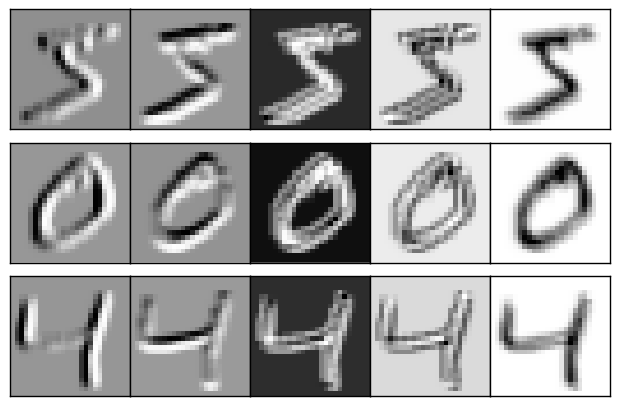

   batch: 156 of 156  --- Epoch:  2   Mean loss:  16209.2117188


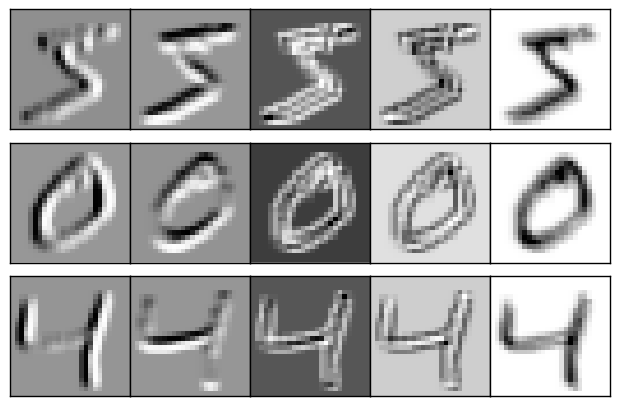

   batch: 156 of 156  --- Epoch:  3   Mean loss:  10835.860555


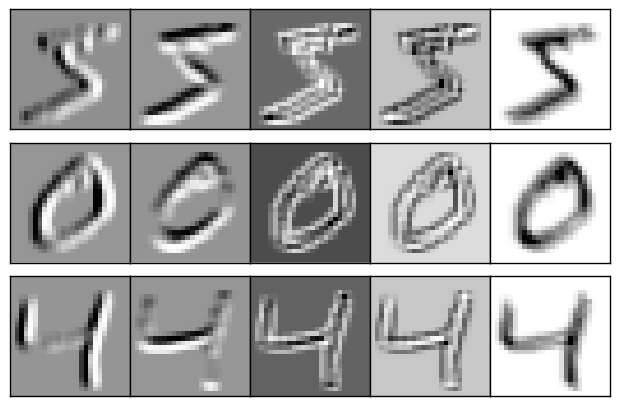

   batch: 156 of 156  --- Epoch:  4   Mean loss:  7799.94693846


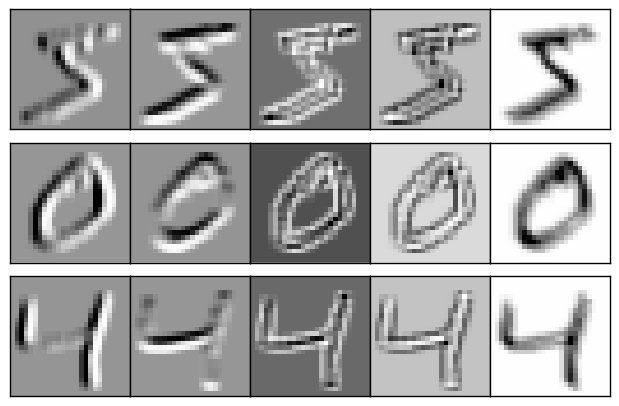

   batch: 156 of 156  --- Epoch:  5   Mean loss:  5802.54293873


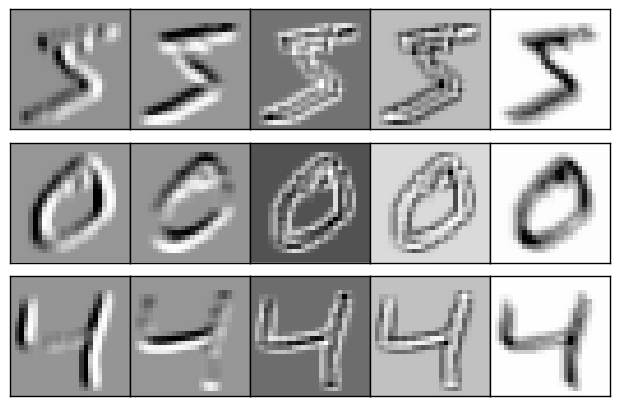

   batch: 156 of 156  --- Epoch:  6   Mean loss:  4430.80354729


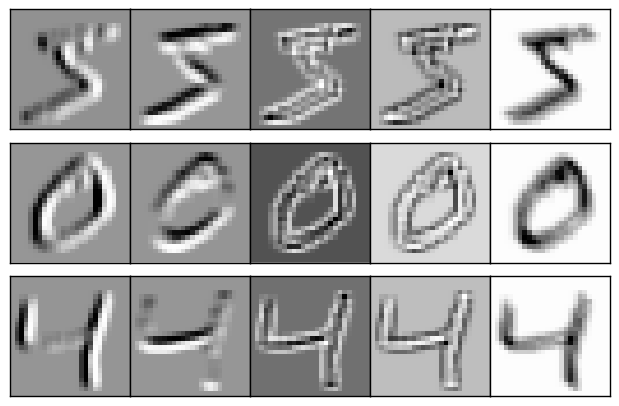

   batch: 156 of 156  --- Epoch:  7   Mean loss:  3467.41298107


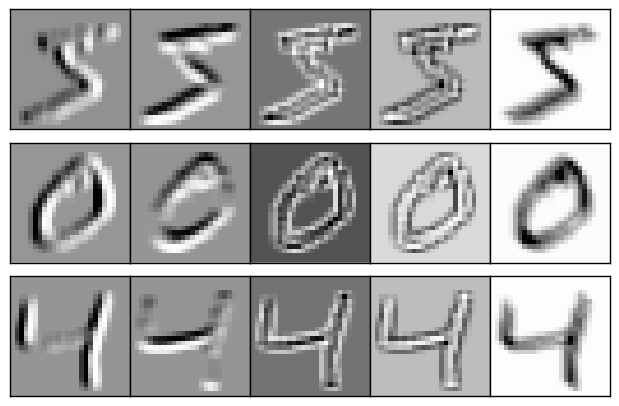

   batch: 156 of 156  --- Epoch:  8   Mean loss:  2778.34913348


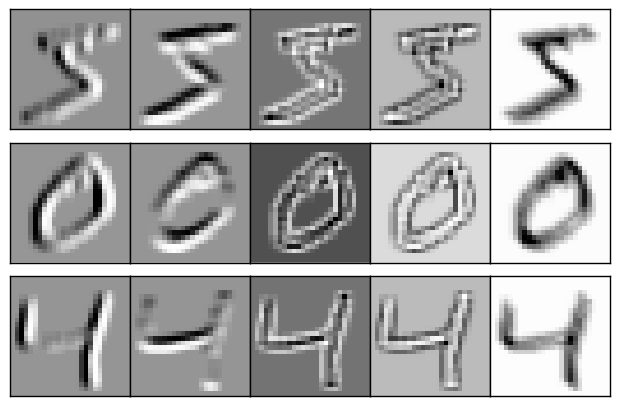

   batch: 156 of 156  --- Epoch:  9   Mean loss:  2276.72568355


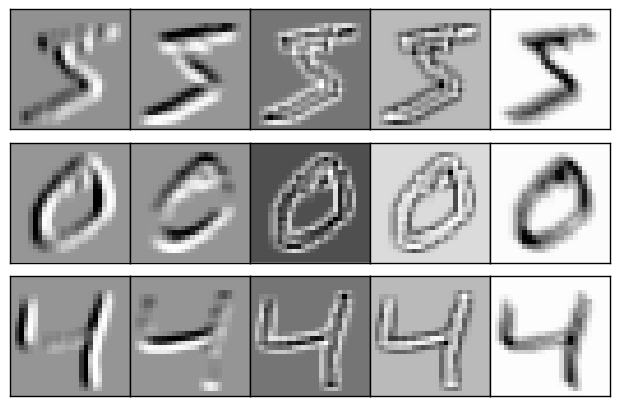

   batch: 156 of 156  --- Epoch:  10   Mean loss:  1904.88039227


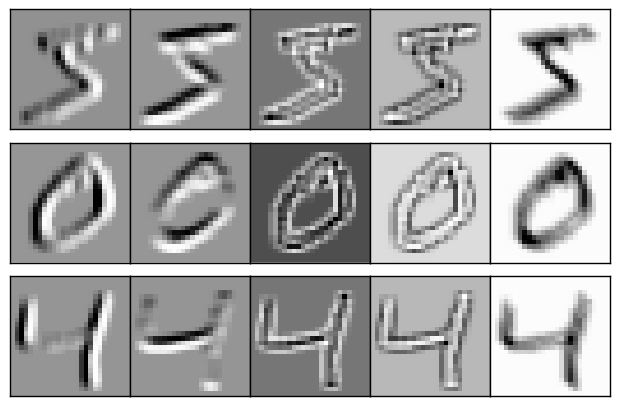

   batch: 156 of 156  --- Epoch:  11   Mean loss:  1623.95046442


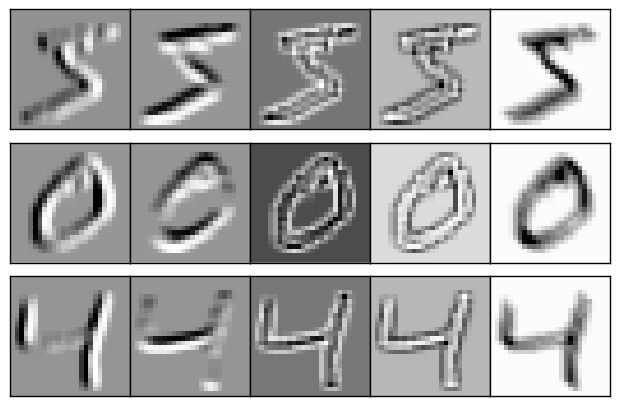

   batch: 156 of 156  --- Epoch:  12   Mean loss:  1407.43158079


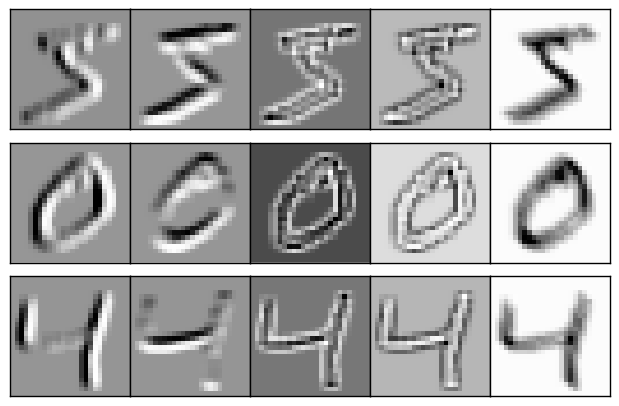

   batch: 156 of 156  --- Epoch:  13   Mean loss:  1237.07249381


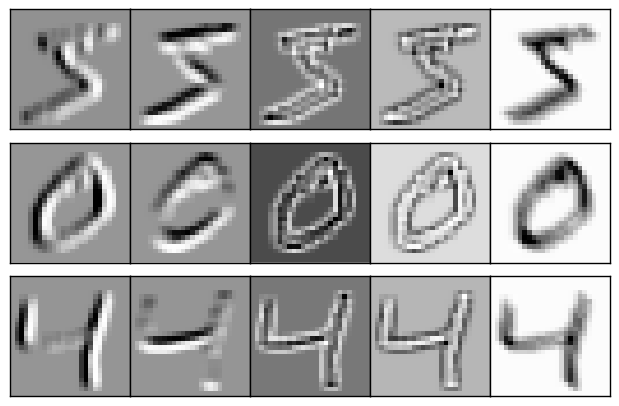

   batch: 156 of 156  --- Epoch:  14   Mean loss:  1100.2010044


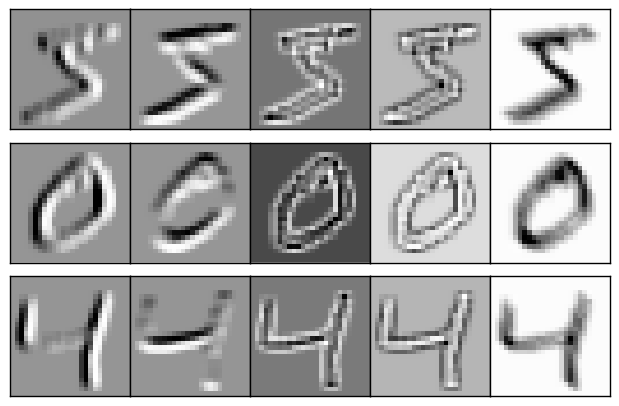

   batch: 156 of 156  --- Epoch:  15   Mean loss:  987.952762072


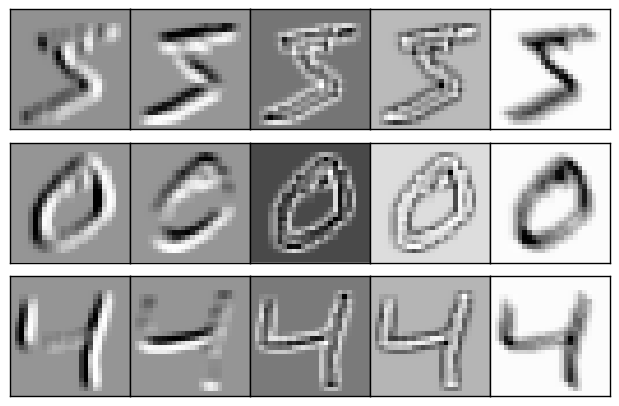

   batch: 156 of 156  --- Epoch:  16   Mean loss:  894.08241389


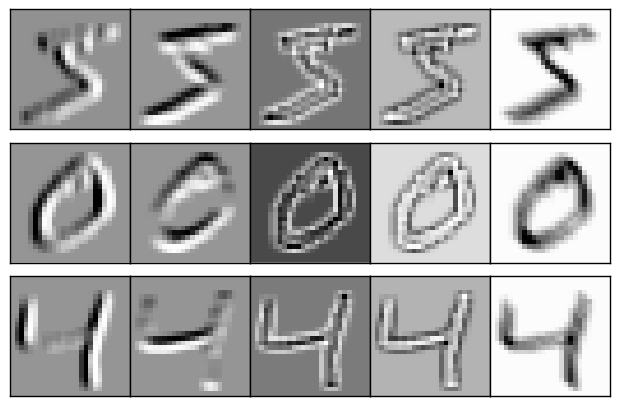

   batch: 156 of 156  --- Epoch:  17   Mean loss:  814.157284469


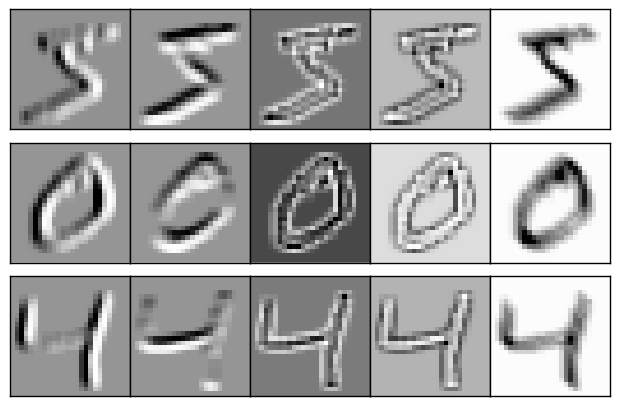

   batch: 156 of 156  --- Epoch:  18   Mean loss:  745.006036847


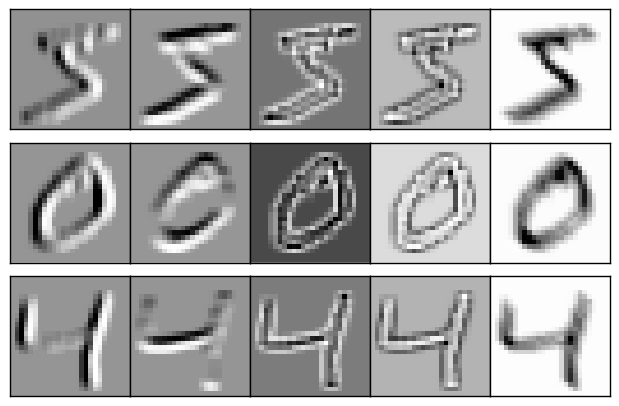

   batch: 156 of 156  --- Epoch:  19   Mean loss:  684.339271892


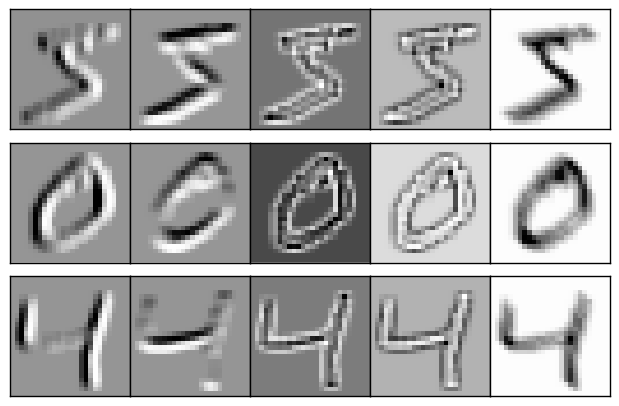

   batch: 156 of 156  --- Epoch:  20   Mean loss:  630.48711896


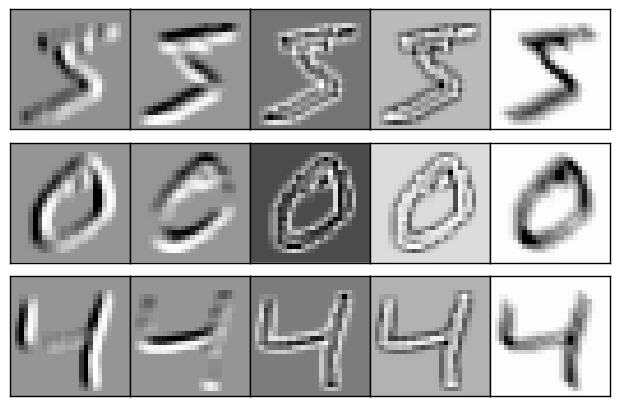

   batch: 156 of 156  --- Epoch:  21   Mean loss:  582.2169873


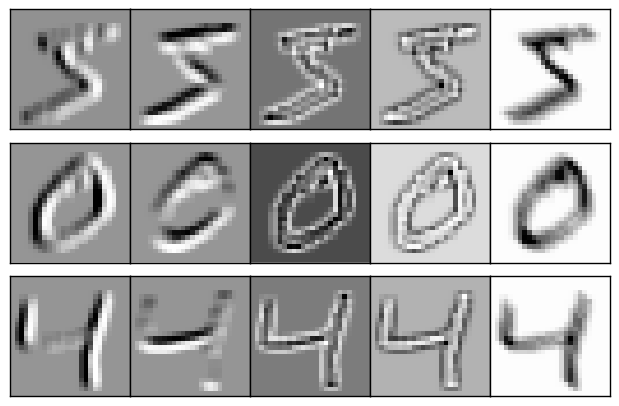

   batch: 156 of 156  --- Epoch:  22   Mean loss:  538.606540022


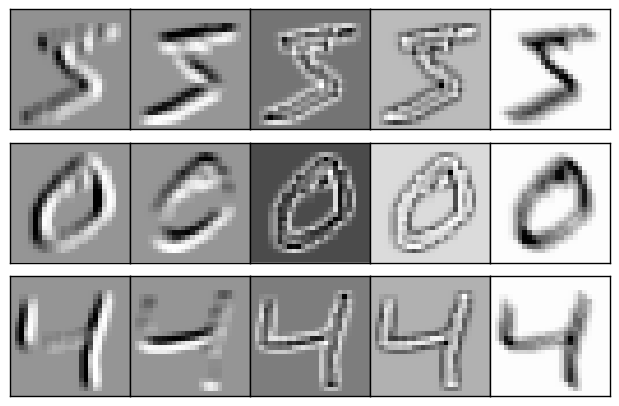

   batch: 156 of 156  --- Epoch:  23   Mean loss:  498.954872133


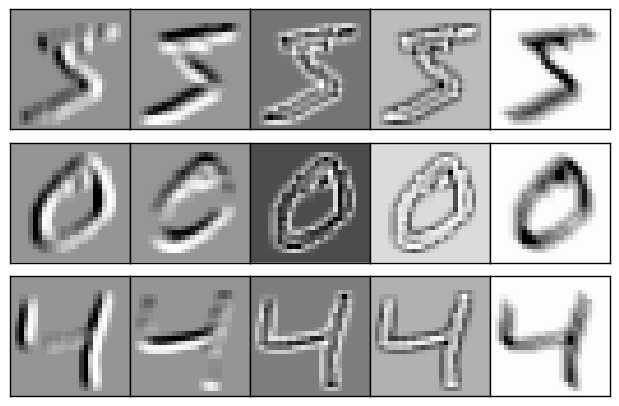

   batch: 156 of 156  --- Epoch:  24   Mean loss:  462.720208687


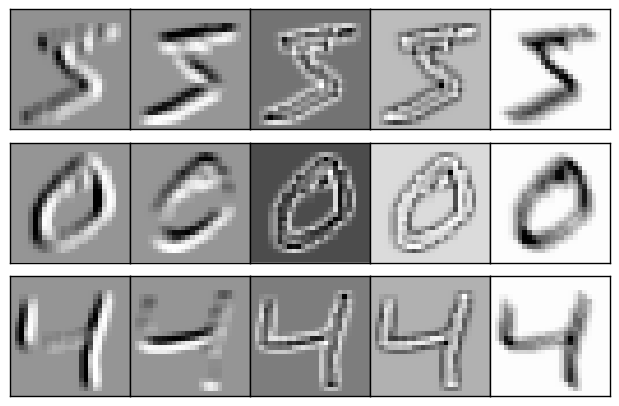

   batch: 156 of 156  --- Epoch:  25   Mean loss:  429.476064317


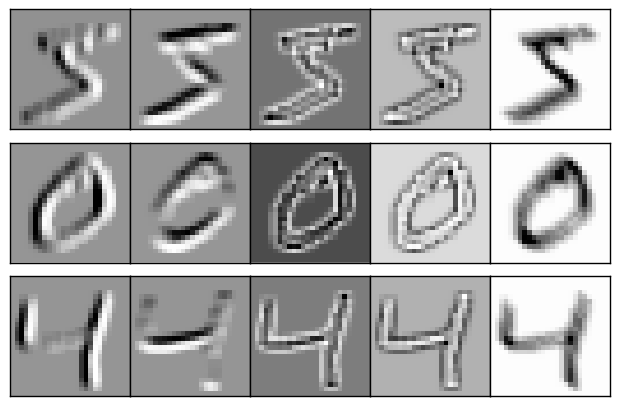

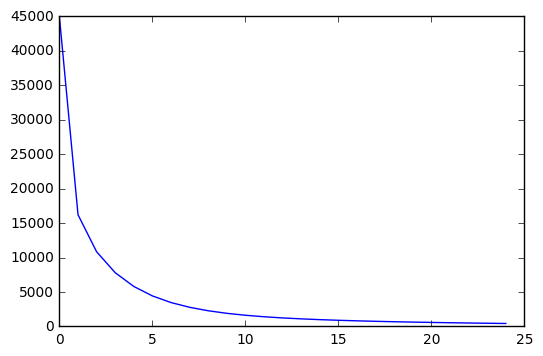

Saving network snapshot to conv5-3x3-maxpool-100.net


In [29]:
train_net()

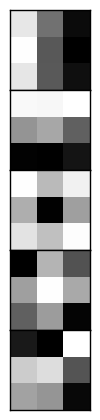

(5, 1, 3, 3)

In [23]:
imshow(c.kernels)

In [8]:
nn.get_output(x)
c.get_delta(target=y)
np.set_printoptions(threshold=np.nan)
grad_test = c.backprop_delta(c.delta)
grad_test, b = c.get_param_grad()

In [9]:
def grad_check(param, eps = 1e-10):

    check = np.zeros_like(param)
    for p in range(param.size):
        param.flat[p] += eps
        nn.get_output(x)
        f_plus = nn.get_crit(y)

        param.flat[p] -= 2*eps
        nn.get_output(x)
        f_minus = nn.get_crit(y)

        check.flat[p] = (f_plus - f_minus)/(2 * eps)

        #cleanup
        param.flat[p] += eps
    return check

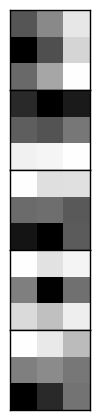

(5, 1, 3, 3)

In [7]:
imshow(w)

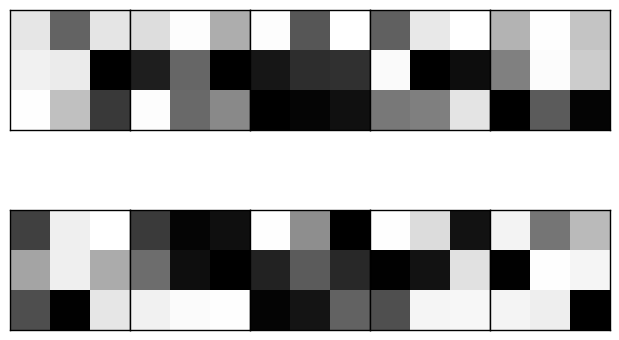

69.4519927026


In [36]:
gt = grad_test.squeeze()
gc = grad_check(c.kernels, 1e-13).squeeze()
diff = abs(gt-gc)
imshow(np.array([c.kernels.squeeze(),diff]))
print diff.max()

In [23]:
# WTF????

In [38]:
print gc, '\n\n'
print gt

[[[ 236.47  218.28  177.35]
  [ 268.3   241.02  186.45]
  [ 231.92  204.64  159.16]]

 [[ 413.82  450.2   427.46]
  [ 372.89  386.54  354.7 ]
  [ 222.83  213.73  195.54]]

 [[ 445.65  472.94  482.03]
  [ 513.86  509.32  518.41]
  [ 536.6   541.15  513.86]]

 [[ 150.07  177.35  159.16]
  [ 227.37  295.59  241.02]
  [ 186.45  200.09  168.26]]

 [[  13.64   22.74   40.93]
  [  50.02   50.02   54.57]
  [  81.85   72.76   59.12]]] 


[[[ 238.6   217.9   177.41]
  [ 267.07  240.65  187.63]
  [ 229.89  207.3   158.65]]

 [[ 398.14  432.37  410.03]
  [ 359.36  369.11  336.6 ]
  [ 216.13  208.13  190.2 ]]

 [[ 396.48  413.15  412.58]
  [ 446.72  445.66  451.74]
  [ 467.54  473.16  450.85]]

 [[ 149.93  178.4   163.08]
  [ 231.54  291.66  240.07]
  [ 183.26  200.52  167.92]]

 [[  14.03   24.65   39.69]
  [  53.05   50.14   54.9 ]
  [  81.5    72.26   56.1 ]]]


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[[ 0  1  2  3  5  6  7  8 10 11 12 13]
 [ 1  2  3  4  6  7  8  9 11 12 13 14]
 [ 5  6  7  8 10 11 12 13 15 16 17 18]
 [ 6  7  8  9 11 12 13 14 16 17 18 19]]


In [4]:
A = np.arange(4*3*5*5).reshape(4,3,5,5) + 1
res = c.backprop_delta(A)
np.set_printoptions(threshold='nan')
print res
print c.kernels

[[[[  0   0   0   0   0   0   0   0]
   [  0   0   0   1   2   3   4   5]
   [  0   0   0   6   7   8   9  10]
   [  0   0   0  11  12  13  14  15]
   [  0   0   0  16  17  18  19  20]
   [  0   0   0  21  22  23  24  25]]

  [[  0   0   0   0   0   0   0   0]
   [  0   0   0  26  27  28  29  30]
   [  0   0   0  31  32  33  34  35]
   [  0   0   0  36  37  38  39  40]
   [  0   0   0  41  42  43  44  45]
   [  0   0   0  46  47  48  49  50]]

  [[  0   0   0   0   0   0   0   0]
   [  0   0   0  51  52  53  54  55]
   [  0   0   0  56  57  58  59  60]
   [  0   0   0  61  62  63  64  65]
   [  0   0   0  66  67  68  69  70]
   [  0   0   0  71  72  73  74  75]]]


 [[[  0   0   0   0   0   0   0   0]
   [  0   0   0  76  77  78  79  80]
   [  0   0   0  81  82  83  84  85]
   [  0   0   0  86  87  88  89  90]
   [  0   0   0  91  92  93  94  95]
   [  0   0   0  96  97  98  99 100]]

  [[  0   0   0   0   0   0   0   0]
   [  0   0   0 101 102 103 104 105]
   [  0   0   0 106 107 108 